In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie
  
  CairoMakie.activate!(type = string(fig_format))
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/docencia/analisis-practicas-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using SymPy  # Para el cálculo simbólico.
using Plots  # Para el dibujo de gráficas.
using Makie, GLMakie # Para el dibújo de gráficas en 3d.
#plotlyjs() # Para obtener gráficos interactivos.
using LaTeXStrings  # Para usar código LaTeX en los gráficos.
using LinearAlgebra # Para el módulo, producto escalar y vectorial de vectores.
using CalculusWithJulia # Utilidades para dibujar vectores.

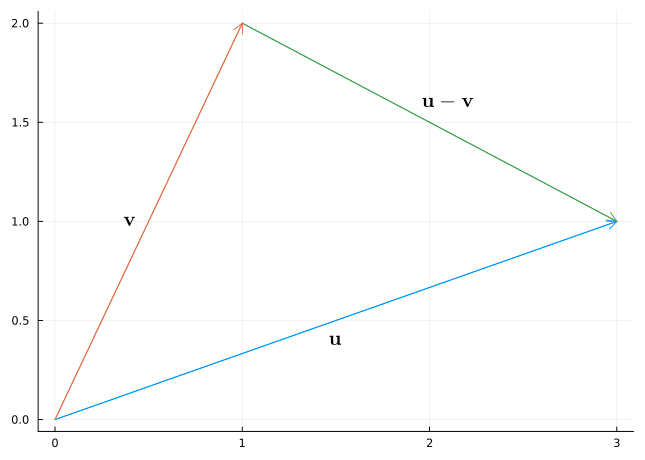

In [3]:
using CalculusWithJulia
using LaTeXStrings
O = [0, 0] # Origin
u = [3, 1]
v = [1, 2]
Plots.plot()
arrow!(O, u)
arrow!(O, v)
arrow!(v, u-v)
annotate!(1.5, 0.4, L"$\mathbf{u}$")
annotate!(0.4, 1, L"$\mathbf{v}$")
annotate!(2.1, 1.6, L"$\mathbf{u}-\mathbf{v}$")

In [4]:
using LinearAlgebra
u = [-1, 2, -1]
v = [-2, 0, 1]
println("Módulo de u: $(norm(u))")
println("Módulo de v: $(norm(v))")
println("Vector unitario con la dirección de u $(u/norm(u))")
println("Vector unitario con la dirección de v $(v/norm(v))")

Módulo de u: 2.449489742783178
Módulo de v: 2.23606797749979
Vector unitario con la dirección de u [-0.4082482904638631, 0.8164965809277261, -0.4082482904638631]
Vector unitario con la dirección de v [-0.8944271909999159, 0.0, 0.4472135954999579]


In [5]:
println("Producto escalar de u y v $(dot(u, v))")
# También se puede usar el clásico punto ⋅
println("Producto escalar de u y v $(u ⋅ v)")

Producto escalar de u y v 1
Producto escalar de u y v 1


In [6]:
println("Producto vectorial de u y v $(cross(u, v))")
# También se puede usar la clásica cruz × 
println("Producto vectorial de u y v $(u × v)")

Producto vectorial de u y v [2, 3, 4]
Producto vectorial de u y v [2, 3, 4]


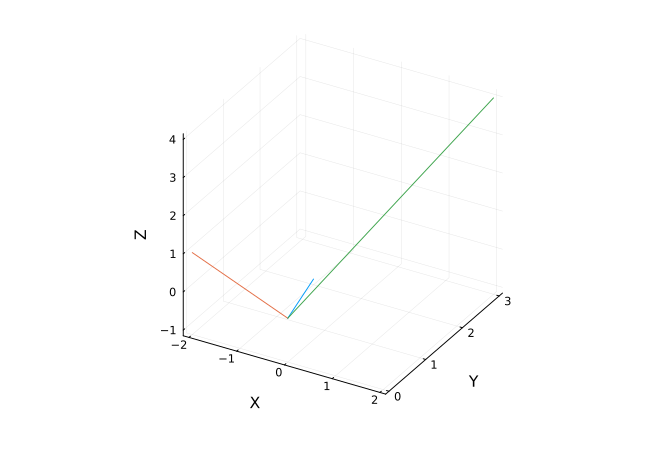

In [7]:
using CalculusWithJulia
Plots.plot(xlabel = "X", ylabel = "Y", zlabel = "Z", legend = false)
O = [0, 0 ,0]
arrow!(O, u)
arrow!(O, v)
arrow!(O, u × v)

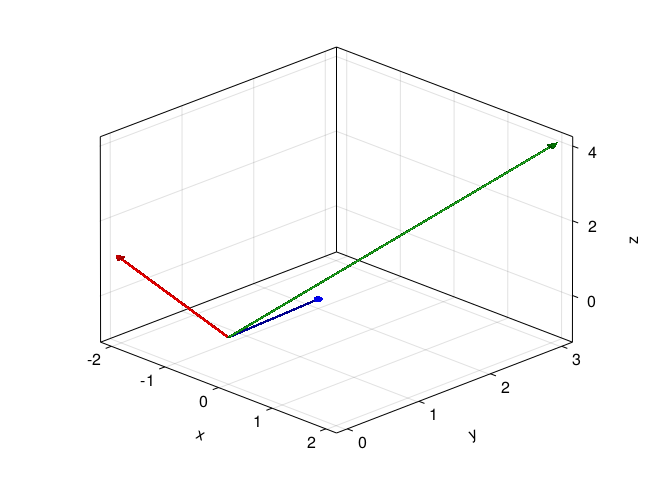

In [8]:
using GLMakie
fig = Figure()
ax = Axis3(fig[1,1], azimuth = -pi/4)
O = [0, 0 ,0]
arrows!(ax, [Point3(O)], [Vec3(u), Vec3(v), Vec3(u × v)], 
    linecolor = [:blue,:red, :green], arrowcolor = [:blue,:red, :green],
    linewidth = 0.02, arrowsize = Vec3(0.1, 0.1, 0.1),
    align = :origin)
fig

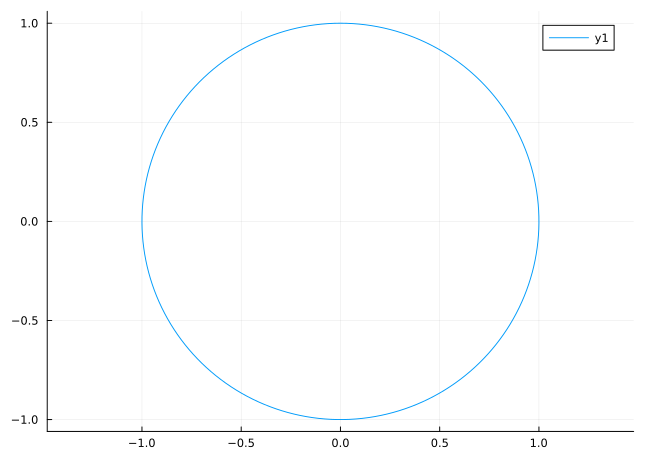

In [9]:
using Plots
using CalculusWithJulia
f(t) = [sin(t), cos(t)] 
ts = range(0, 2pi, length = 200)
xs, ys = unzip(f.(ts))
Plots.plot(xs, ys, aspectratio = 1)

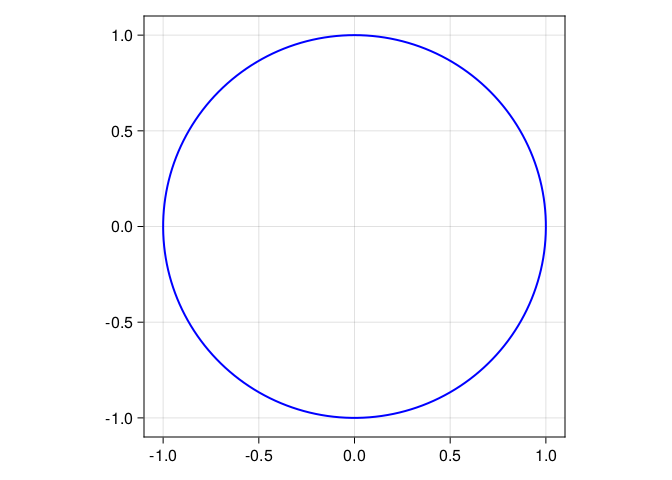

In [10]:
using GLMakie
using CalculusWithJulia
f(t) = [sin(t), cos(t)] 
ts = range(0, 2pi, length = 200)
xs, ys = unzip(f.(ts))
#GLMakie.activate!()
fig = Figure()
ax = Axis(fig[1,1], aspect = AxisAspect(1))
lines!(ax, xs, ys, linewidth = 2, color = :blue)
fig

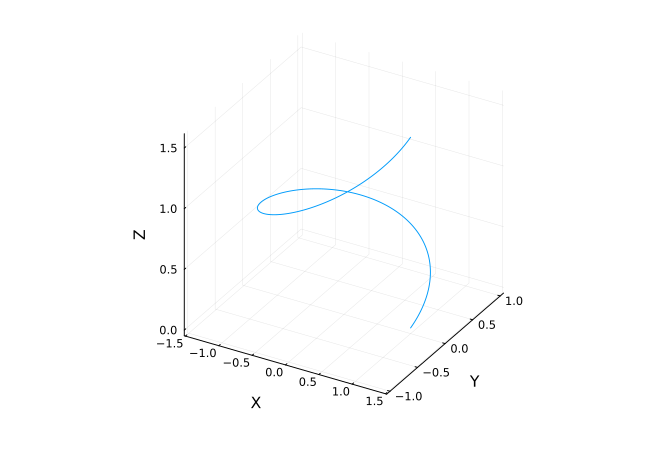

In [11]:
g(t) = [cos(t), sin(t), t/4] 
ts = range(0, 2pi, length = 200)
xs, ys, zs = unzip(g.(ts))
Plots.plot(xs, ys, zs, aspect_ratio = :equal, xlabel = "X", ylabel = "Y", zlabel = "Z", label = "")

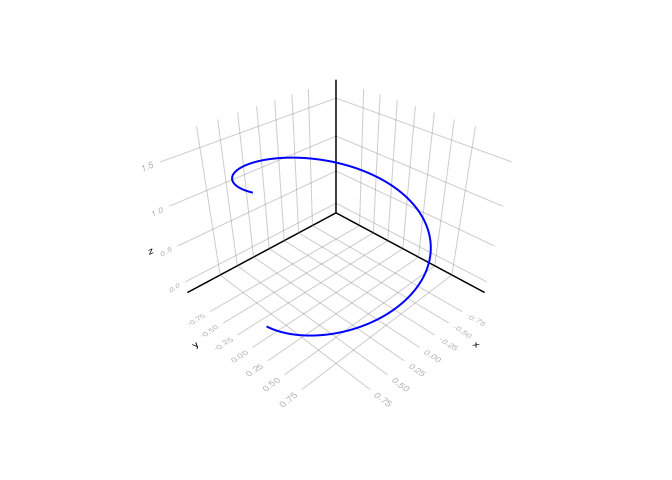

In [12]:
using GLMakie
using CalculusWithJulia
#GLMakie.activate!()
g(t) = [cos(t), sin(t), t/4] 
ts = range(0, 2pi, length = 200)
xs, ys, zs = unzip(g.(ts))
fig = Figure()
lines(fig[1,1], xs, ys, zs; linewidth = 2, color = :blue)
fig

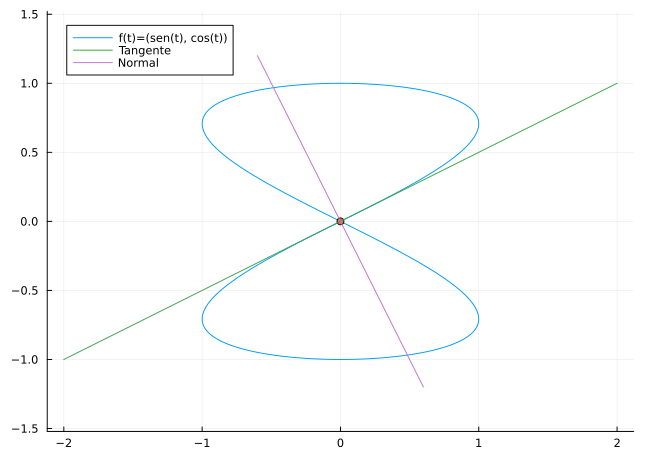

In [13]:
using SymPy, Plots
@syms t::real
# Definimos la función vectorial
f(t) = [sin(2t), cos(t)]
# Instante 
a = pi/2
# Dibujamos la trayectoria
Plots.plot(f(t)..., 0, 2pi, aspect_ratio = :equal, label = "f(t)=(sen(t), cos(t))")
# Dibujamos el punto de tangencia
Plots.scatter!([f(a)[1]],[f(a)[2]], label = "")
# Calculamos la derivada en el punto.
df = subs.(diff.(f(t)), t=>a)
# Calculamos la ecuación de la recta tangente.
tl(t) = f(a) + df * t
# Dibujamos la recta tangente.
Plots.plot!(tl(t)..., -1, 1, label = "Tangente")
# Calculamos la ecuación de la recta normal
nl(t) = f(a) - [df[2],-df[1]] * t
Plots.plot!(nl(t)..., -0.6, 0.6, label = "Normal")

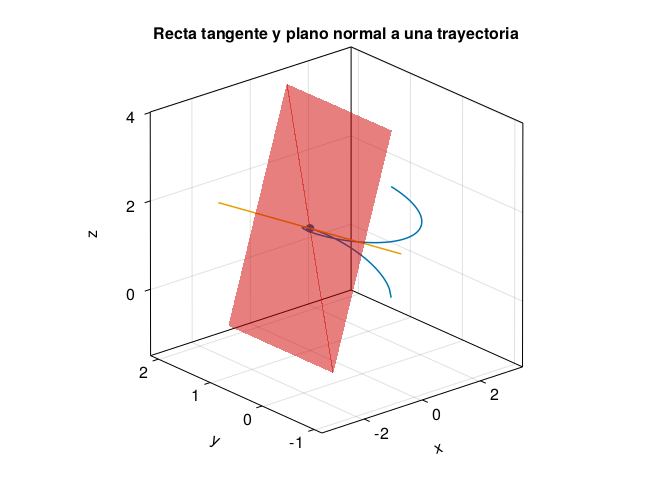

In [14]:
using SymPy, LinearAlgebra, GLMakie
@syms x, y, z, t::real
# Definimos la función vectorial
g(t) = [cos(t), sin(t), sqrt(t)]
# Instante 
a = pi/2
# Dibujamos la trayectoria
ts = range(0, 2pi, 200)
points = Point3.(g.(ts))
fig = Figure()
ax = Axis3(fig[1,1], title = "Recta tangente y plano normal a una trayectoria", aspect = :equal)
lines!(ax, points)
# Dibujamos el punto de tangencia.
Makie.scatter!([Point3(g(a))])
# Calculamos la derivada en el punto.
dg = subs.(diff.(g(t)), t=>a)
# Calculamos la ecuación de la recta tangente.
tl(t) = g(a) + dg * t
# Dibujamos la recta tangente.
pointstl = Point3.(tl.(range(-pi, pi, 2)))
lines!(ax, pointstl)
# Calculamos la ecuación del plano normal
np(x,y) = solve(dot(([x, y, z] - g(a)),dg), z)[1]
xs = range(-1, 1, 2)
ys = range(0, 2, 2)
zs = [np(x,y) for x in xs, y in ys]
Makie.surface!(ax, xs, ys, zs, colormap = ["red"], alpha = 0.5, transparency = true)
fig

In [15]:
#| echo: false
using QuizQuestions
nothing

In [16]:
#| echo: false
using SymPy
@syms x::real a::real b::real c::real
f1(x) = sin(x)^2
f2(x) = a*x^2+b
f3(x) = log(x)
nonlinsolve([limit(f1, 0, dir="-") - limit(f2, 0, dir="+"),limit(f2(x), x, c, dir="-") - limit(f3, c, dir="+")], (a,b,c))
solve(limit(f1, 0, dir="-") - limit(f2, 0, dir="+"))
solve(limit(f2(x), x, c, dir="-") - limit(f3, c, dir="+"))[1]
choices = (L"a=\sqrt{e}, b=0, c=\frac{1}{e}.", L"a=\frac{1}{2e}, b=0, c=e^{1/2}.", L"a=1, b=1, c=1.", L"a=1, b=0, c=e.", "Para ningún valor.")
answer = 2
radioq(choices, answer)

QuizQuestions.Radioq((L"$a=\sqrt{e}, b=0, c=\frac{1}{e}.$", "Para ningún valor.", L"$a=1, b=0, c=e.$", L"$a=1, b=1, c=1.$", L"$a=\frac{1}{2e}, b=0, c=e^{1/2}.$"), 5, [1, 2, 3, 4, 5], (L"$a=\sqrt{e}, b=0, c=\frac{1}{e}.$", "Para ningún valor.", L"$a=1, b=0, c=e.$", L"$a=1, b=1, c=1.$", L"$a=\frac{1}{2e}, b=0, c=e^{1/2}.$"), "", "", "", false)

In [17]:
#| echo: false
using SymPy
@syms x::real
f(x) = ln(sqrt(x^2/2))
g(x) = x^3+x^2-1
sol = solve(Eq(-1/diff(f), diff(g)))[1]
numericq(sol, 1e-15)

QuizQuestions.Numericq(-1, 1.0e-15, "", "", "", "", nothing)